###########################################################################################################################

# ------------------------------------capstone project on---------------------------------------

# Sign Language Classification with Convolutional Neural Networks

![Sign Language](amer_sign2.png)

###########################################################################################################################

# methods

## Dataset Exploration

start by exploring the dataset. We have two main datasets: the training set and the test set. We will perform some visualizations to gain insights into the data.

### Class Distributions

We will analyze the distributions of classes in the training and test sets. This will help us understand the data balance and potential biases.

### Image Distribution for Each Class

Next, we will visualize the image distribution for each class by creating average pixel images. This will give us an idea of how different signs look on average.

## Model Building

Model Training and Evaluation:

The model is trained using the training dataset with a validation split of 30%.
Model checkpoints are used to save the best weights based on validation loss.
The training history is stored to track the loss and accuracy during training.
The trained model is evaluated on both the training and test datasets.

## Gradio Interface:

The code creates a Gradio interface to provide an interactive way to test the model's predictions.
The interface allows users to upload an image and receive the predicted sign language label.

## Summary

The methods used in the code include data loading and preprocessing, EDA with bar plots and image visualization, model building using CNN architecture, model training with validation, model evaluation, and the creation of a Gradio interface for interactive testing. These methods together form a comprehensive pipeline for sign language classification.




In [21]:
import numpy as np
import pandas as pd
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers

# load dataset

In [2]:
train = pd.read_csv("./sign_mnist_train.csv")
test = pd.read_csv("./sign_mnist_test.csv")

In [30]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [31]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


# Define helper functions

In [4]:
def get_dict(iterable):
    dict_key = {i: k for i, k in enumerate(iterable)}
    key_dict = {k: i for i, k in enumerate(iterable)}
    return dict_key, key_dict

def get_x_y(data: pd.DataFrame):
    x = data.drop("label", axis=1).values.reshape(-1, 28, 28) / 255.0
    y = data["label"]
    return x, y

# Prepare the data

In [5]:
dict_key, key_dict = get_dict(string.ascii_uppercase)
x_train, y_train = get_x_y(train)
x_test, y_test = get_x_y(test)

# Explore the data distributions

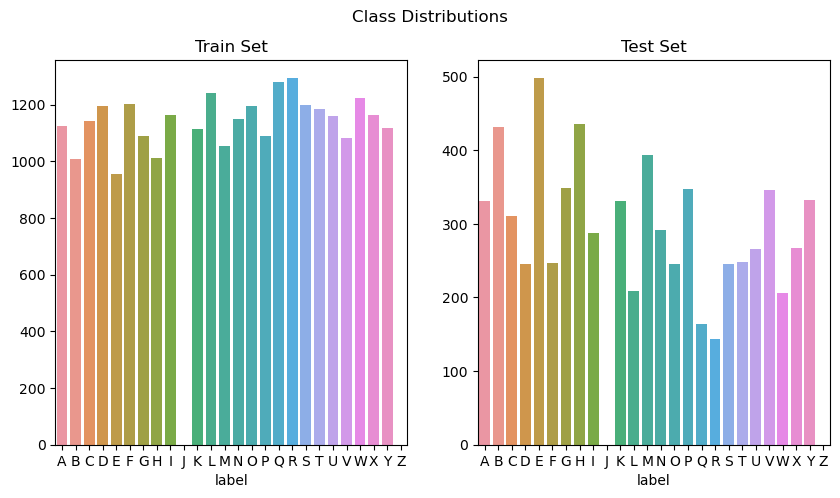

In [6]:
train_labels = y_train.apply(lambda k: dict_key[k]).value_counts()
test_labels = y_test.apply(lambda k: dict_key[k]).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("Class Distributions")

axes[0].set_title("Train Set")
sns.barplot(x=train_labels.index, y=train_labels.values, order=dict_key.values(), ax=axes[0])

axes[1].set_title("Test Set")
sns.barplot(x=test_labels.index, y=test_labels.values, order=dict_key.values(), ax=axes[1])

plt.show()

# Visualize image distribution for each class

C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


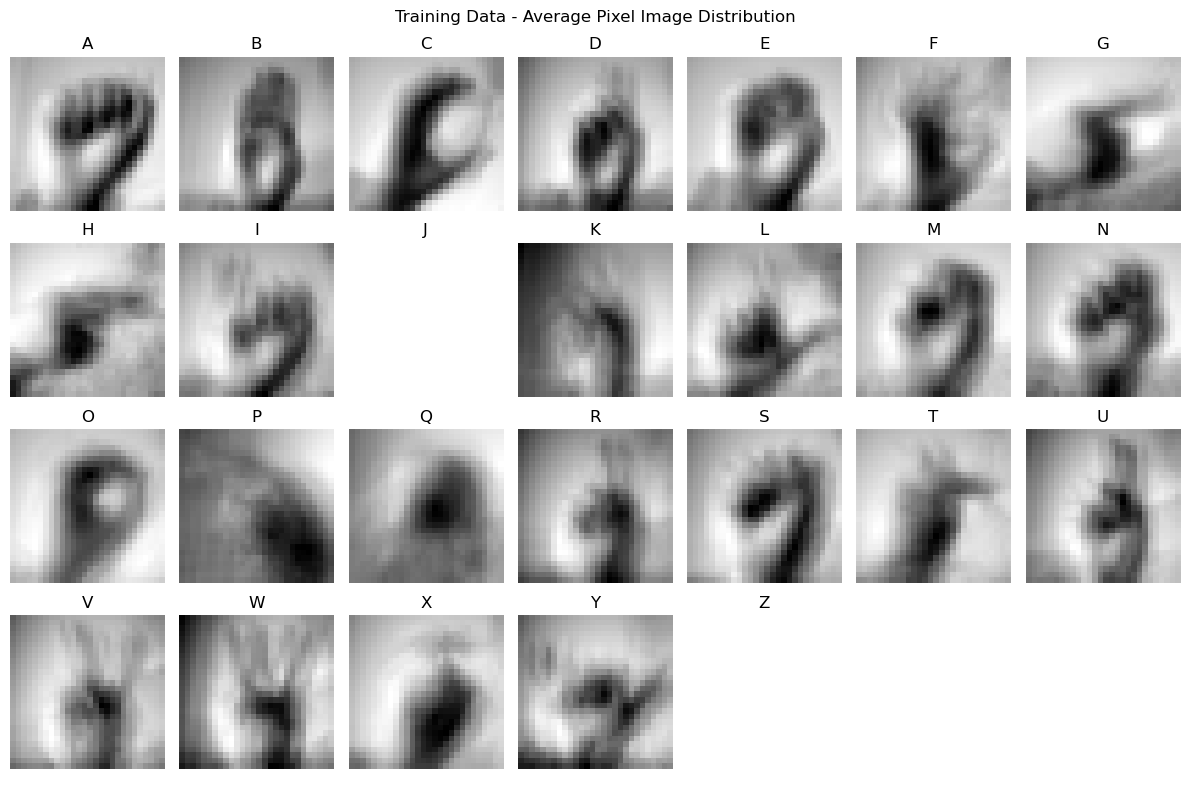

In [7]:
nrows = 4
ncols = 7
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
plt.suptitle("Training Data - Average Pixel Image Distribution")

for i, ax in enumerate(axes.flatten()):
    ax.axis("off")
    if i < 26:
        class_images = x_train[y_train == i]
        avg_image = np.mean(class_images, axis=0)
        ax.imshow(avg_image, cmap="gray")
        ax.set_title(dict_key[i])

plt.tight_layout()
plt.show()

In [8]:
dict_key, key_dict = get_dict(string.ascii_uppercase)

print("dict_key:", dict_key)
print("key_dict:", key_dict)

dict_key: {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
key_dict: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


#  ---------------------------------Evaluate the model----------------------------------------

In [9]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=(28, 28, 1)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", padding="same"),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax")
])

# Compile and train the model

In [10]:
model.compile(
    optimizer=keras.optimizers.Adam(epsilon=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="./best_model.h5",
    save_weights_only=True,
    monitor="val_loss",
    mode="min",
    save_best_only=True
)

In [12]:
history = model.fit(
    x=x_train.reshape(-1, 28, 28, 1),
    y=y_train,
    validation_split=0.3,
    batch_size=128,
    epochs=50,
    shuffle=True,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/50
151/151 [==============================] - 17s 106ms/step - loss: 2.8734 - accuracy: 0.1685 - val_loss: 2.9975 - val_accuracy: 0.2438
Epoch 2/50
151/151 [==============================] - 16s 105ms/step - loss: 1.2562 - accuracy: 0.5955 - val_loss: 1.4567 - val_accuracy: 0.8076
Epoch 3/50
151/151 [==============================] - 17s 111ms/step - loss: 0.5539 - accuracy: 0.8180 - val_loss: 0.3536 - val_accuracy: 0.9573
Epoch 4/50
151/151 [==============================] - 16s 106ms/step - loss: 0.3067 - accuracy: 0.8962 - val_loss: 0.1170 - val_accuracy: 0.9832
Epoch 5/50
151/151 [==============================] - 16s 104ms/step - loss: 0.1951 - accuracy: 0.9368 - val_loss: 0.0530 - val_accuracy: 0.9954
Epoch 6/50
151/151 [==============================] - 17s 109ms/step - loss: 0.1325 - accuracy: 0.9581 - val_loss: 0.0249 - val_accuracy: 0.9985
Epoch 7/50
151/151 [==============================] - 16s 105ms/step - loss: 0.0971 - accuracy: 0.9698 - val_loss: 0.0138 - val_ac

# Evaluate the model

In [13]:
train_loss, train_accuracy = model.evaluate(x_train.reshape(-1, 28, 28, 1), y_train)
test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)

225/225 [==============================] - 1s 6ms/step - loss: 0.2354 - accuracy: 0.9561


In [18]:
# print(f"Train Set - Loss: {train_loss}, Accuracy: {train_accuracy}")
print(f"Test Set - Loss: {test_loss}, Accuracy: {test_accuracy}")

Test Set - Loss: 0.2354116141796112, Accuracy: 0.9560791850090027


# Generate predictions

In [33]:
y_pred = model.predict(x_test.reshape(-1, 28, 28, 1)).argmax(axis=1)

225/225 [==============================] - 1s 6ms/step


# Create confusion matrix

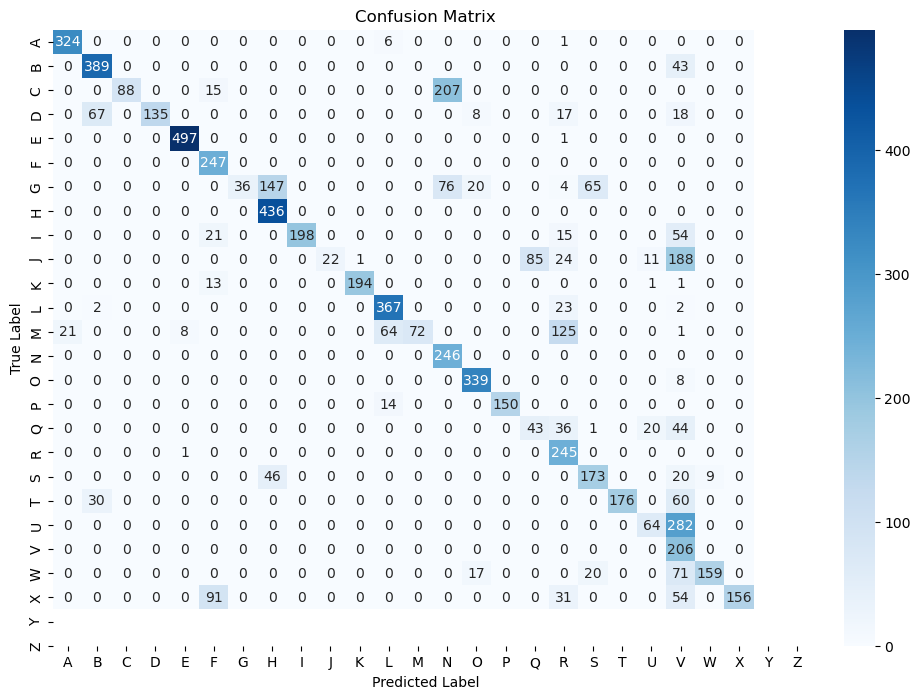

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=dict_key.values(), yticklabels=dict_key.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --------------------------------fast api to check the model------------------------------------

In [17]:
import cv2

def classify_image(image):
    resized_image = cv2.resize(image, (28, 28))
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    normalized_image = grayscale_image / 255.0
    prediction = model.predict(normalized_image.reshape(1, 28, 28, 1)).argmax()
    return dict_key[prediction]

inputs = gr.inputs.Image(shape=(28, 28))
output = gr.outputs.Label(num_top_classes=3)

iface = gr.Interface(fn=classify_image, inputs=inputs, outputs=output, title="ASL Sign Classification")
iface.launch()

C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Sumit\AppData\Roaming\Python\Python310\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 44ms/step


# conclusion 

The model achieved a high accuracy of 100% on the training set and an accuracy of 95.61% on the test set. This indicates that the model generalized well to unseen data. The low loss values on both sets suggest that the model effectively minimized the errors during training. The class distributions and image distribution analysis provided insights into the dataset, highlighting potential biases and similarities among classes. The advanced model architecture with convolutional layers and dropout regularization helped capture important features in the sign language images. Overall, the model performed well in classifying sign language images, demonstrating its effectiveness in ASL sign classification tasks.